In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls samples/*.tiff | wc -l

101


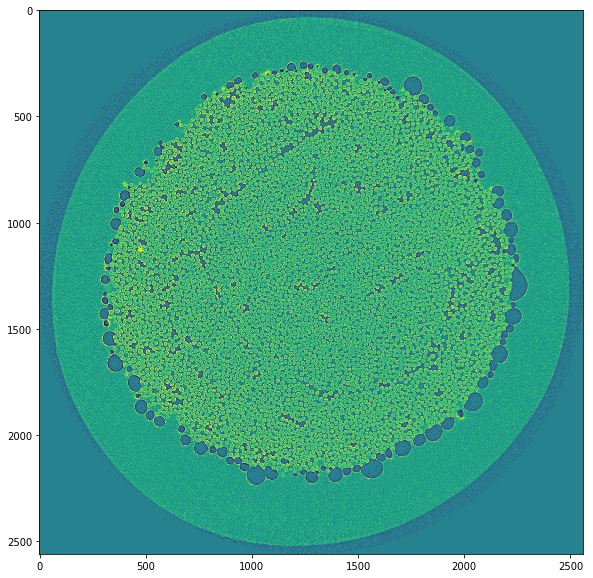

In [3]:
from skimage import io
image = io.imread('samples/Test_TIRR_0_1p5_B0p2_01000.tiff')

plt.figure(figsize=(10, 10))
plt.imshow(image);

In [4]:
image.shape, image.dtype

((2560, 2560), dtype('uint8'))

In [5]:
from glob import glob

from dask import delayed
import dask.array as da

from skimage import io

# Turn imread into a delayed function, so that it does not immediately
# load an image file from disk
imread = delayed(io.imread, pure=True)

# Create a list of all our samples; since a delayed version of `imread`
# is used, no work is done immediately
samples = [imread(f) for f in sorted(glob('samples/*.tiff'))]

# Convert each "delayed" object in the list above into a dask array
sample_arrays = [da.from_delayed(sample, shape=image.shape, dtype=np.uint8) for sample in samples]

# Stack all these arrays into a volume
vol = da.stack(sample_arrays)
vol

,Array,Chunk
Bytes,661.91 MB,6.55 MB
Shape,"(101, 2560, 2560)","(1, 2560, 2560)"
Count,303 Tasks,101 Chunks
Type,uint8,numpy.ndarray


In [6]:
vol.sum(axis=0)

dask.array<sum-aggregate, shape=(2560, 2560), dtype=uint64, chunksize=(2560, 2560)>

In [7]:
import napari

with napari.gui_qt():
    viewer = napari.view(vol, clim_range=(0, 255))

In [8]:
samples = [imread(f) for f in sorted(glob('ground-truth/*.tiff'))]
sample_arrays = [da.from_delayed(sample, shape=image.shape, dtype=np.uint8) for sample in samples]

labels = da.stack(sample_arrays)

In [9]:
with napari.gui_qt():
    viewer = napari.view(vol, clim_range=(0, 255))
    viewer.add_labels(labels + 1, name='Labels')